### 🩺 Heart Failure Clinical Records Dataset

📄 Deskripsi Umum
Dataset ini berisi informasi klinis dari pasien dengan penyakit jantung. Data ini sering digunakan untuk membangun model prediktif guna menentukan apakah pasien berisiko mengalami kematian akibat gagal jantung.

📊 Jumlah Data
Total data: 299 baris (pasien)

Fitur: 13 kolom

Target: DEATH_EVENT (1 = meninggal, 0 = selamat)



🎯 Tujuan Analisis
Memprediksi kemungkinan kematian pasien berdasarkan fitur-fitur klinis, menggunakan algoritma machine learning seperti:

Naive Bayes

Decision Tree

Random Forest

Logistic Regression, dll.

## 📦 Import Libraries

Pada bagian ini, kita mengimpor berbagai pustaka Python yang dibutuhkan untuk melakukan analisis data, pelatihan model machine learning, dan evaluasi model:

🤖 Model Machine Learning
- `LogisticRegression` — Model regresi logistik untuk klasifikasi biner.
- `KNeighborsClassifier` — Model klasifikasi berdasarkan tetangga terdekat.
- `GaussianNB` — Naive Bayes dengan distribusi Gaussian.
- `DecisionTreeClassifier`, `plot_tree` — Model pohon keputusan dan visualisasinya.

In [89]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (confusion_matrix, classification_report,
                            accuracy_score, precision_score, recall_score,
                            f1_score, roc_curve, roc_auc_score)

In [90]:
data = pd.read_csv('./heart_failure_clinical_records.csv')


## 🧹 Eksplorasi dan Pembersihan Data

Langkah-langkah berikut dilakukan untuk memahami dan membersihkan data:

- Menghapus fitur yang kurang relevan atau redundan: `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, `smoking`.
- Mengecek apakah terdapat data kosong (missing values).
- Menghapus data duplikat jika ada.
- Melihat ringkasan statistik dari dataset dengan `.describe()`.
- Menampilkan informasi struktur dataset dengan `.info()`.
- Membuat histogram dari semua fitur numerik untuk memahami distribusi datanya.


In [91]:
data.drop(columns=['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'])


age  creatinine_phosphokinase  ejection_fraction  platelets  \
0     55.0                       748                 45  263358.03   
1     65.0                        56                 25  305000.00   
2     45.0                       582                 38  319000.00   
3     60.0                       754                 40  328000.00   
4     95.0                       582                 30  461000.00   
...    ...                       ...                ...        ...   
4995  45.0                       582                 55  543000.00   
4996  60.0                       582                 30  127000.00   
4997  95.0                       112                 40  196000.00   
4998  65.0                       160                 20  327000.00   
4999  40.0                       244                 45  275000.00   

      serum_creatinine  serum_sodium  time  DEATH_EVENT  
0                  1.3           137    88            0  
1                  5.0           130   207            0  
2                  0.9           140   244            0  
3                  1.2           126    90            0  
4                  2.0           132    50            1  
...                ...           ...   ...          ...  
4995               1.0           132   250            0  
4996               0.9           145    95            0  
4997               1.0           138    24            1  
4998               2.7           116     8            1  
4999               0.9           140   174            0  

[5000 rows x 8 columns]

In [92]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [93]:
data.duplicated().sum()

np.int64(3680)

In [94]:
data.drop_duplicates(inplace=True)

In [95]:
data.describe()

age      anaemia  creatinine_phosphokinase     diabetes  \
count  1320.000000  1320.000000               1320.000000  1320.000000   
mean     60.587377     0.485606                576.135606     0.446970   
std      11.913538     0.499982                970.630878     0.497368   
min      40.000000     0.000000                 23.000000     0.000000   
25%      50.000000     0.000000                115.000000     0.000000   
50%      60.000000     0.000000                249.000000     0.000000   
75%      69.000000     1.000000                582.000000     1.000000   
max      95.000000     1.000000               7861.000000     1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count        1320.000000          1320.000000    1320.000000   
mean           37.881818             0.369697  263751.982189   
std            11.572547             0.482906  106345.010143   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  208000.000000   
50%            38.000000             0.000000  263358.030000   
75%            45.000000             1.000000  310000.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium          sex      smoking         time  \
count       1320.000000   1320.000000  1320.000000  1320.000000  1320.000000   
mean           1.356447    136.665909     0.645455     0.307576   132.678788   
std            0.998924      4.380990     0.478557     0.461665    77.779493   
min            0.500000    113.000000     0.000000     0.000000     4.000000   
25%            0.900000    134.000000     0.000000     0.000000    74.000000   
50%            1.100000    137.000000     1.000000     0.000000   119.500000   
75%            1.300000    140.000000     1.000000     1.000000   206.000000   
max            9.400000    148.000000     1.000000     1.000000   285.000000   

       DEATH_EVENT  
count  1320.000000  
mean      0.300758  
std       0.458761  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1320 entries, 0 to 4972
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1320 non-null   float64
 1   anaemia                   1320 non-null   int64  
 2   creatinine_phosphokinase  1320 non-null   int64  
 3   diabetes                  1320 non-null   int64  
 4   ejection_fraction         1320 non-null   int64  
 5   high_blood_pressure       1320 non-null   int64  
 6   platelets                 1320 non-null   float64
 7   serum_creatinine          1320 non-null   float64
 8   serum_sodium              1320 non-null   int64  
 9   sex                       1320 non-null   int64  
 10  smoking                   1320 non-null   int64  
 11  time                      1320 non-null   int64  
 12  DEATH_EVENT               1320 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 144.4 KB


## 📊 Visualisasi Distribusi Data

- **Histogram**: Visualisasi distribusi masing-masing fitur numerik menggunakan histogram dengan 30 bins.
- **Bar Chart DEATH_EVENT**: Menampilkan distribusi dari target `DEATH_EVENT` (0 = selamat, 1 = meninggal) menggunakan countplot untuk mengetahui proporsi kelas target dalam dataset.

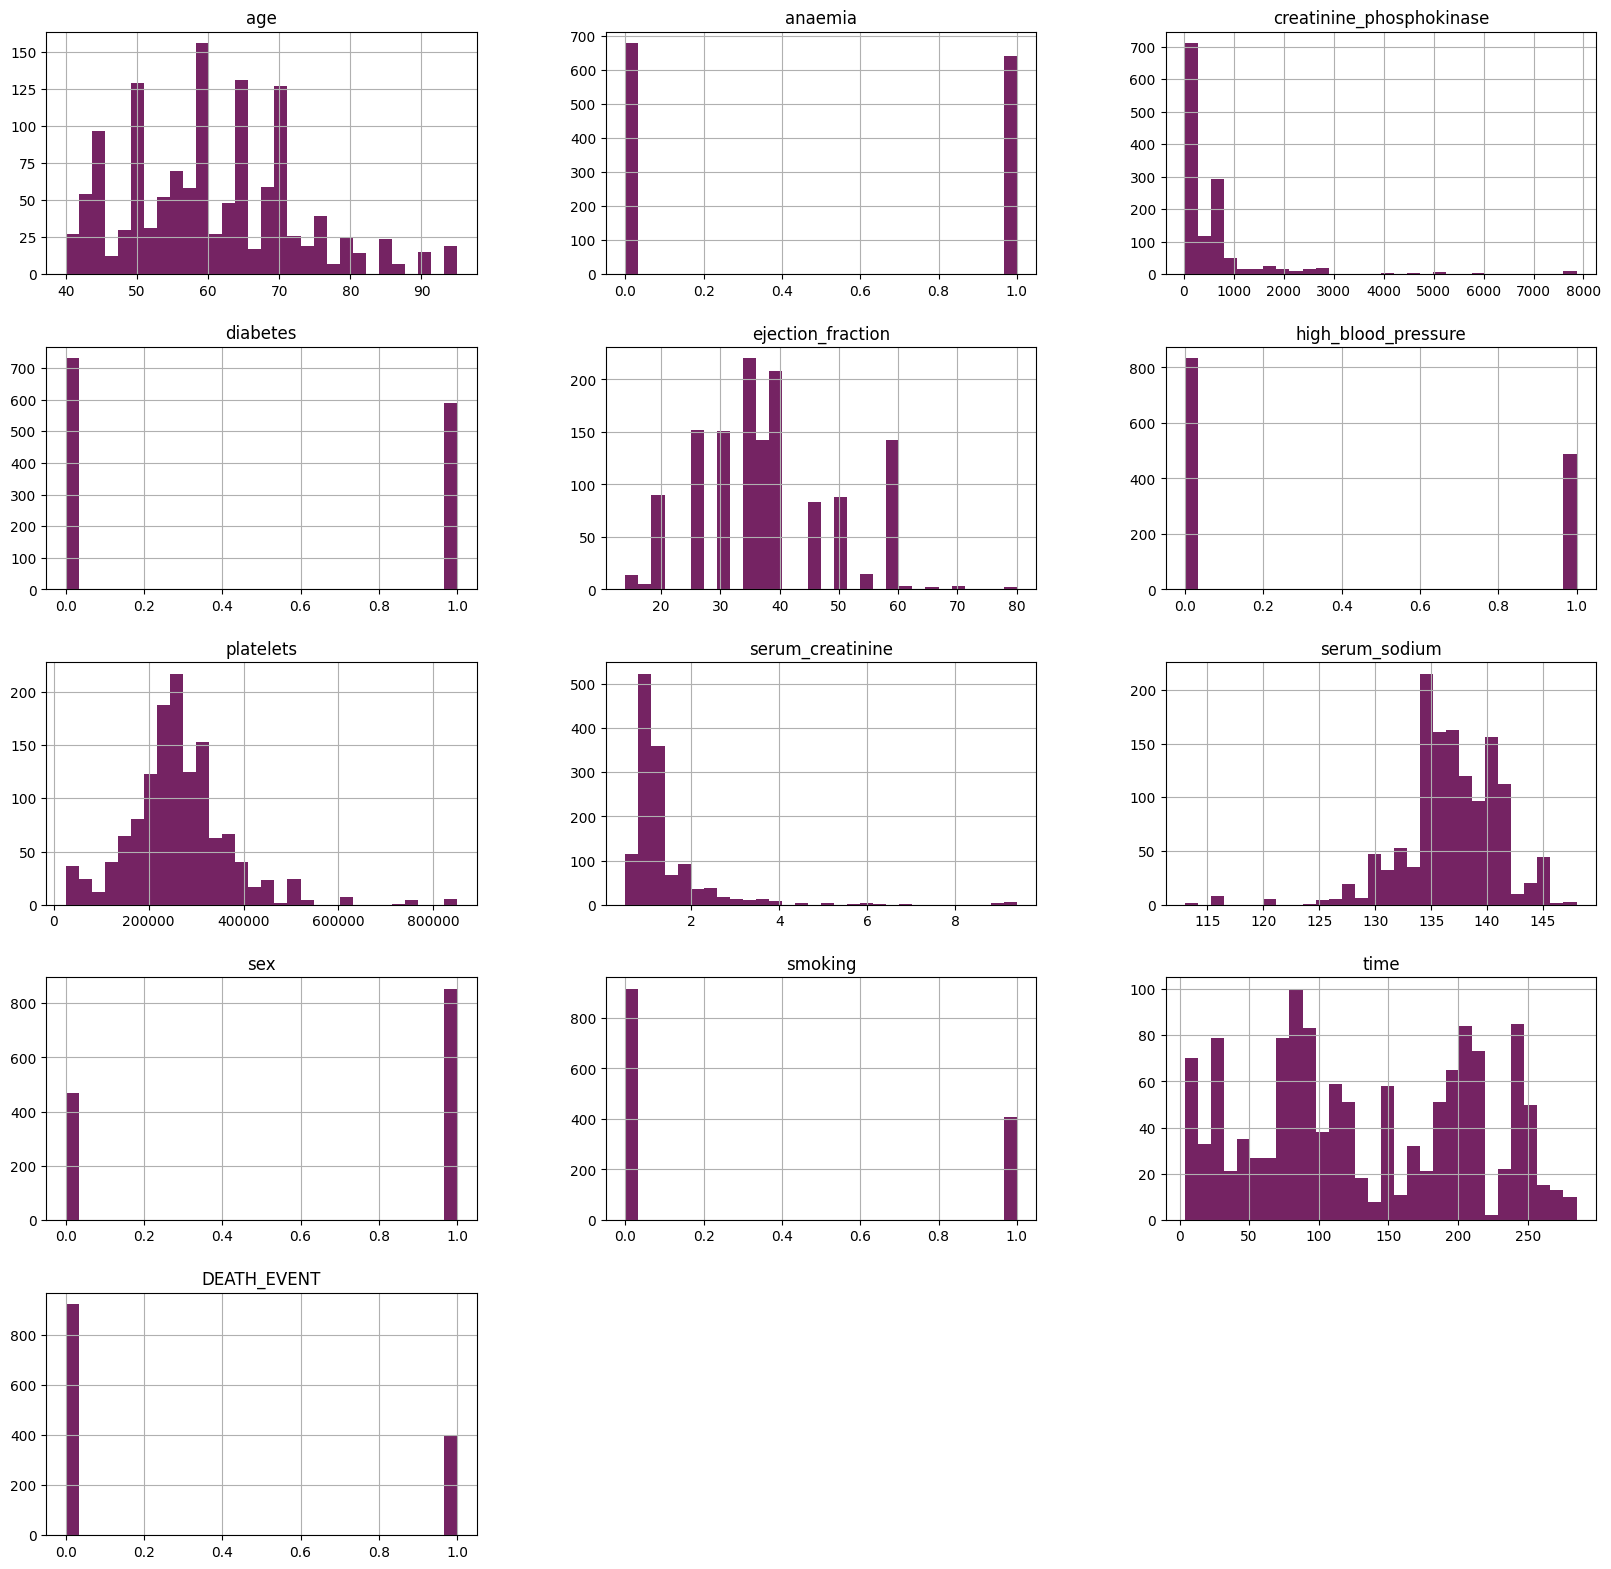

In [97]:
data.hist(bins=30, figsize=(20,40), layout=(10,3), color='#752363');

In [98]:
data= data.drop(columns=['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'])


C:\Users\asus\AppData\Local\Temp\ipykernel_32472\2522644444.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DEATH_EVENT', data=data, palette=['#752363','#B2B4E6'])


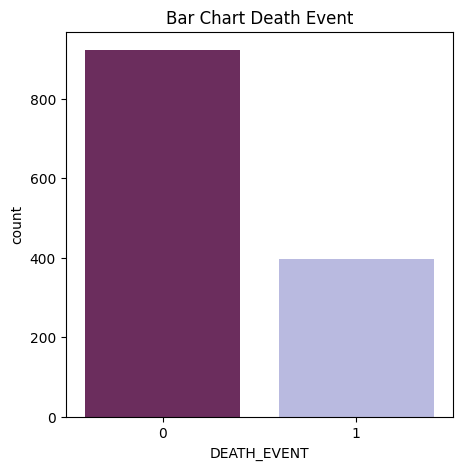

In [99]:
# Bar Chart
fig, axs = plt.subplots(1,1, figsize=(5,5))
axs.set_title('Bar Chart Death Event')
sns.countplot(x='DEATH_EVENT', data=data, palette=['#752363','#B2B4E6'])
plt.show()


## 🔗 Korelasi Antar Variabel

- Korelasi antar fitur dihitung menggunakan metode **Pearson**.
- Hasil korelasi divisualisasikan menggunakan **heatmap** dari Seaborn untuk mengidentifikasi hubungan linear antara variabel-variabel.
- Warna dan nilai annotasi pada heatmap memudahkan dalam mengenali fitur yang memiliki pengaruh kuat terhadap target (`DEATH_EVENT`).

In [100]:
print("Informasi Dataset:")
print(data.info())

print("\nStatistik Deskriptif:")
print(data.describe())

print("\nMissing Values:")
print(data.isnull().sum())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 1320 entries, 0 to 4972
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1320 non-null   float64
 1   creatinine_phosphokinase  1320 non-null   int64  
 2   ejection_fraction         1320 non-null   int64  
 3   platelets                 1320 non-null   float64
 4   serum_creatinine          1320 non-null   float64
 5   serum_sodium              1320 non-null   int64  
 6   time                      1320 non-null   int64  
 7   DEATH_EVENT               1320 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 92.8 KB
None

Statistik Deskriptif:
               age  creatinine_phosphokinase  ejection_fraction  \
count  1320.000000               1320.000000        1320.000000   
mean     60.587377                576.135606          37.881818   
std      11.913538                970.630878      

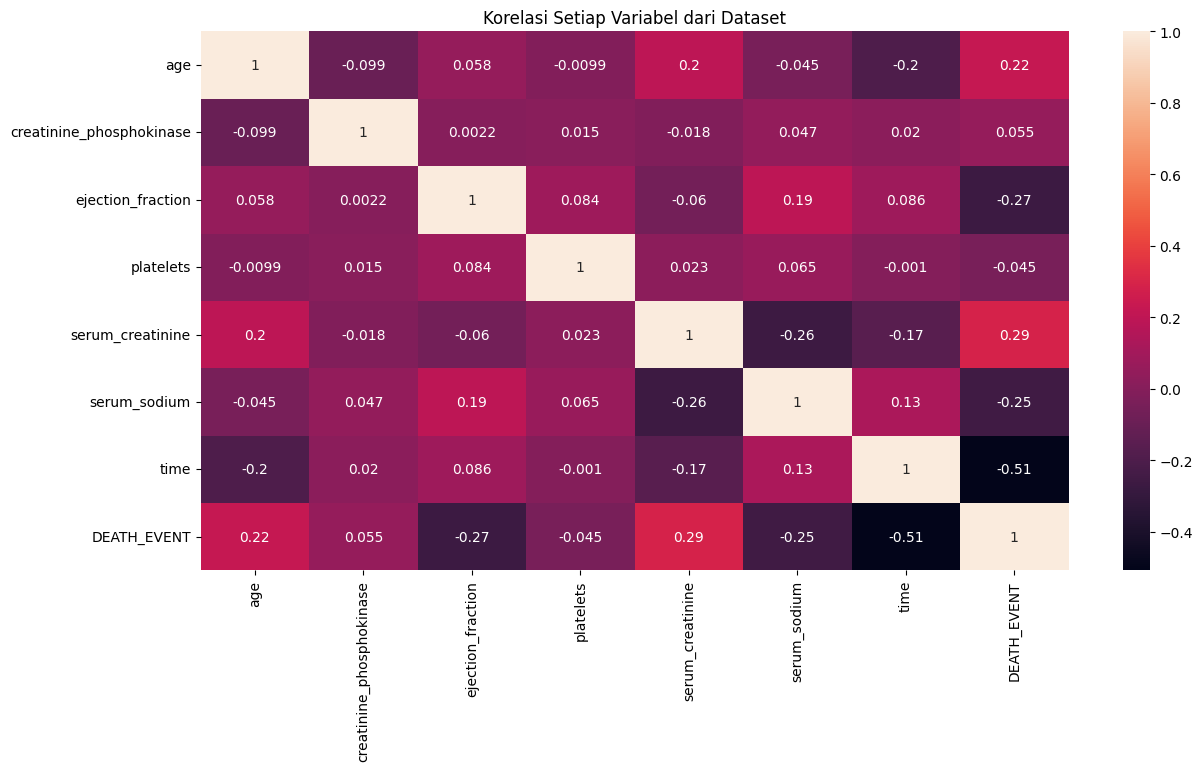

In [101]:
data_correlation = data.corr(method='pearson')

plt.figure(figsize=(14,7))
plt.title("Korelasi Setiap Variabel dari Dataset")
sns.heatmap(data=data_correlation, annot=True)
plt.show()

## ✂️ Membagi Dataset: Training dan Testing

Langkah ini bertujuan untuk memisahkan data menjadi **training set** dan **testing set**:

- `X` berisi semua fitur kecuali kolom terakhir (target), dan `y` berisi kolom target `DEATH_EVENT`.
- Data dibagi dengan rasio 90% untuk pelatihan (`train`) dan 10% untuk pengujian (`test`) menggunakan `train_test_split()` dari `sklearn`.
- Parameter `shuffle=True` memastikan data diacak sebelum pembagian.
- `stratify=y` digunakan agar proporsi kelas pada target tetap seimbang di antara data train dan test.
- `random_state=42` memastikan hasil pembagian data bisa direproduksi (reproducible).

Output menampilkan jumlah baris pada masing-masing subset:
- `X_train` dan `y_train`: data latih
- `X_test` dan `y_test`: data uji

In [102]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 7].values

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.1,shuffle=True, stratify=y, random_state=42)

In [104]:
print("Jumlah baris X_train:", len(X_train))
print("Jumlah baris X_test:", len(X_test))
print("Jumlah baris y_train:", len(y_train))
print("Jumlah baris y_test:", len(y_test))

Jumlah baris X_train: 1188
Jumlah baris X_test: 132
Jumlah baris y_train: 1188
Jumlah baris y_test: 132


## 🤖 Gaussian Naive Bayes Classifier

Pada bagian ini, kita membangun model klasifikasi menggunakan **Gaussian Naive Bayes**, yaitu salah satu algoritma supervised learning yang berdasarkan pada teorema Bayes dengan asumsi bahwa fitur-fitur bersifat independen dan mengikuti distribusi Gaussian (normal).

In [105]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_predGNB = classifier.predict(X_test)
print(y_predGNB)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0]


In [106]:
print(confusion_matrix(y_test, y_predGNB))

[[85  7]
 [18 22]]


In [107]:
print(classification_report(y_test, y_predGNB))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        92
           1       0.76      0.55      0.64        40

    accuracy                           0.81       132
   macro avg       0.79      0.74      0.75       132
weighted avg       0.81      0.81      0.80       132



## 🤖 Multinomial Naive Bayes Classifier

Model ini menggunakan algoritma **Multinomial Naive Bayes**, yang biasanya lebih cocok untuk data dengan fitur diskrit, seperti frekuensi kata dalam dokumen (bag-of-words). Meski begitu, dalam eksperimen ini kita juga mencobanya pada dataset numerik untuk membandingkan performanya.

In [108]:
#Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_predMNB = classifier.predict(X_test)
print(y_predMNB)

[0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0
 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0]


In [109]:
#Multinomial
print(confusion_matrix(y_test, y_predMNB))

[[71 21]
 [23 17]]


In [110]:
print(classification_report(y_test, y_predMNB))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76        92
           1       0.45      0.42      0.44        40

    accuracy                           0.67       132
   macro avg       0.60      0.60      0.60       132
weighted avg       0.66      0.67      0.66       132



## 🤖 Bernoulli Naive Bayes Classifier

Model ini menggunakan algoritma **Bernoulli Naive Bayes**, yang biasanya digunakan untuk data biner (fitur bernilai 0 atau 1). Model ini mengasumsikan bahwa setiap fitur mengikuti distribusi Bernoulli, yaitu hanya memiliki dua kemungkinan nilai.

In [111]:
#Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

y_predBNB = classifier.predict(X_test)
print(y_predBNB)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [112]:
#Bernoulli
print(confusion_matrix(y_test, y_predBNB))

[[92  0]
 [40  0]]


### Evaluasi Model:
- `confusion_matrix()` digunakan untuk melihat performa prediksi model berdasarkan distribusi nilai sebenarnya dan prediksi.
- `classification_report()` memberikan metrik seperti **precision**, **recall**, **f1-score**, dan **accuracy**.

In [113]:
print(classification_report(y_test, y_predBNB))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82        92
           1       0.00      0.00      0.00        40

    accuracy                           0.70       132
   macro avg       0.35      0.50      0.41       132
weighted avg       0.49      0.70      0.57       132



c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

## 📊 Perbandingan Model Naive Bayes

Pada bagian ini, dilakukan evaluasi dan perbandingan kinerja dari tiga varian algoritma **Naive Bayes**:

- `MultinomialNB()`
- `BernoulliNB()`
- `GaussianNB()`

In [114]:
from sklearn.metrics import accuracy_score, log_loss
classifiers=[
    MultinomialNB(),
    BernoulliNB(),
    GaussianNB(),
]

#Logging for visual comparison
log_cols = ["Classifier", "Accuracy", "Log Loss"]
log=pd.DataFrame(columns=log_cols)

for clf in classifiers:
  clf.fit(X_train, y_train)
  name= clf.__class__.__name__

  print("="*30)
  print(name)

  print('*Results*')
  train_predictions = clf.predict(X_test)
  acc=accuracy_score(y_test, train_predictions)
  print("Accuracy: {:.4%}".format(acc))

  log_entry=pd.DataFrame([[name, acc*100,11]], columns=log_cols)
  log = pd.concat([log, log_entry], ignore_index=True)

  print("="*30)

MultinomialNB
*Results*
Accuracy: 66.6667%
BernoulliNB
*Results*
Accuracy: 69.6970%
GaussianNB
*Results*
Accuracy: 81.0606%


C:\Users\asus\AppData\Local\Temp\ipykernel_32472\1733887097.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  log = pd.concat([log, log_entry], ignore_index=True)



--- Naive Bayes Evaluation ---


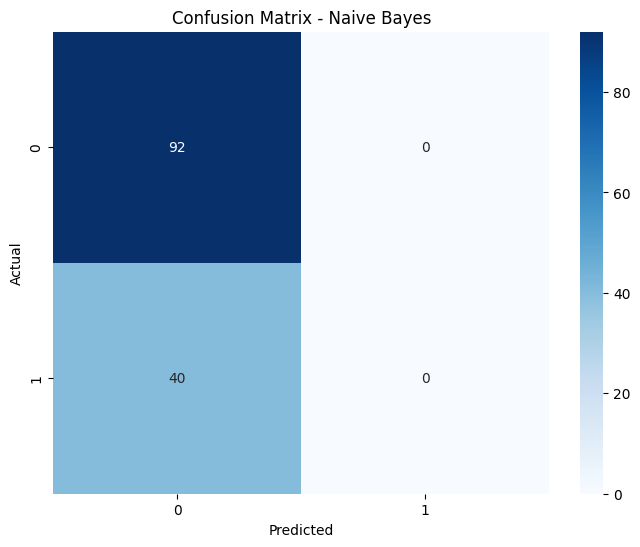

c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

              precision    recall  f1-score   support

           0       0.70      1.00      0.82        92
           1       0.00      0.00      0.00        40

    accuracy                           0.70       132
   macro avg       0.35      0.50      0.41       132
weighted avg       0.49      0.70      0.57       132



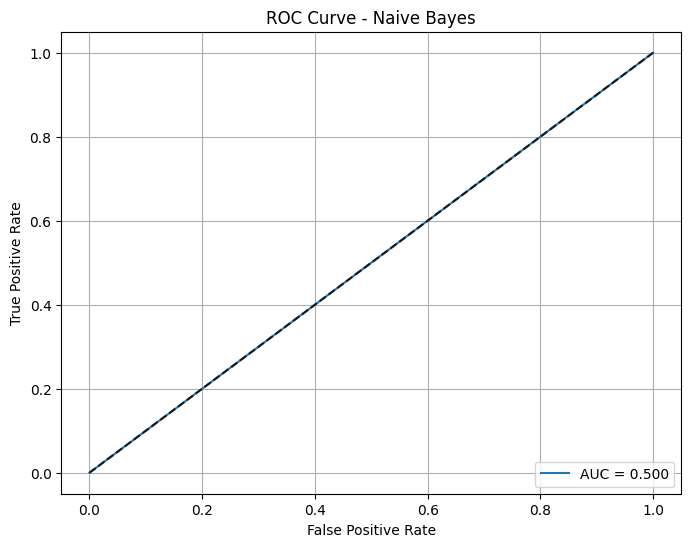

c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [115]:
from sklearn.naive_bayes import BernoulliNB

nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)
y_prob_nb = nb_model.predict_proba(X_test)[:, 1]

nb_metrics = evaluate_model(y_test, y_pred_nb, y_prob_nb, "Naive Bayes")


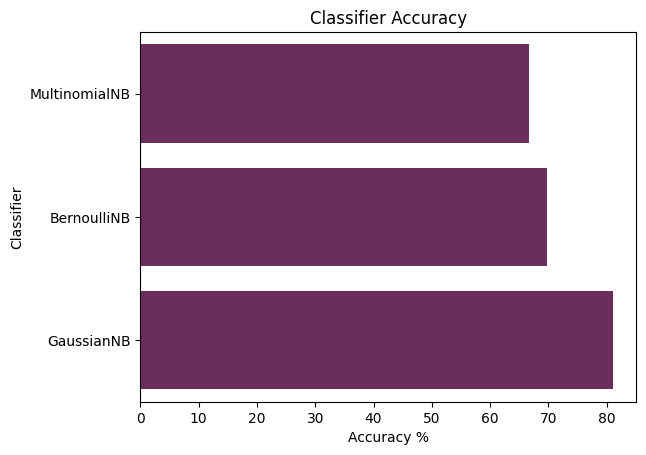

In [116]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy',y='Classifier', data=log, color="#752363")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

## 🔹 Pisahkan Fitur dan Target
Pisahkan kolom fitur (`X`) dan target (`y`) dari dataset.

In [117]:
# Pisahkan fitur dan target
X = data.drop("DEATH_EVENT", axis=1)
y = data["DEATH_EVENT"]

In [118]:
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'anaemia']

# Cek kolom yang benar-benar ada di X
categorical_features_existing = [f for f in categorical_features if f in X.columns]

le = LabelEncoder()
for feature in categorical_features_existing:
    X[feature] = le.fit_transform(X[feature])


In [119]:
# Standardisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 🔹 Latih Model Logistic Regression
Latih model `LogisticRegression` pada data yang sudah diskalakan. Tambahkan `max_iter` agar proses training konvergen.


In [ ]:
# Latih model Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_scaled, y)


LogisticRegression(max_iter=1000)

In [121]:
# Buat DataFrame untuk visualisasi
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", ascending=False)

In [122]:
# Ambil koefisien dan nama fitur
coefficients = model.coef_[0]
features = X.columns


In [123]:
# Model 1: Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]  # untuk kurva ROC

## 🔹 Mencari Nilai K Optimal untuk K-Nearest Neighbors (KNN)

Lakukan pencarian nilai **K terbaik** menggunakan teknik **cross-validation** dengan `scoring='accuracy'`. Rentang nilai K yang diuji adalah dari 1 hingga 30.

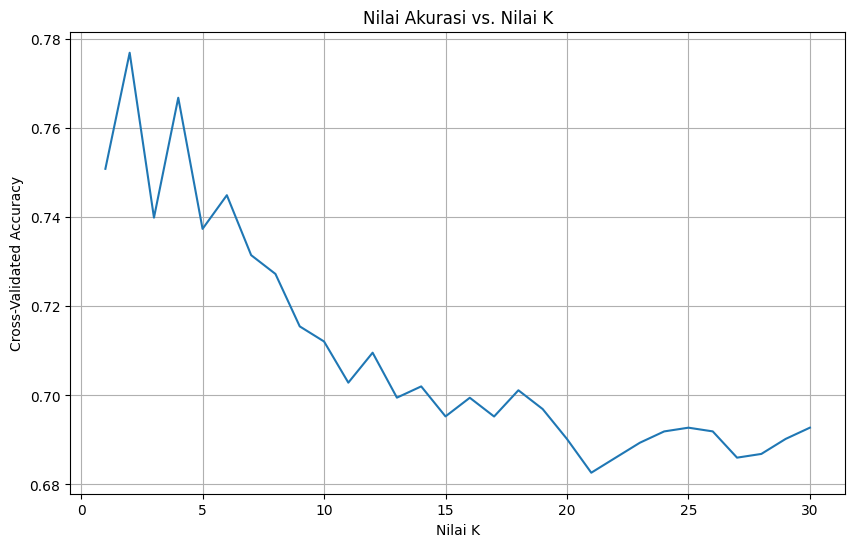

K optimal: 2


In [124]:
# Mencari K optimal
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# Visualisasi pencarian K terbaik
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores)
plt.xlabel('Nilai K')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Nilai Akurasi vs. Nilai K')
plt.grid(True)
plt.show()

# Pilih K optimal
optimal_k = k_scores.index(max(k_scores)) + 1
print(f"K optimal: {optimal_k}")

In [125]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

k_range = range(1, 21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)

optimal_k = k_range[np.argmax(scores)]
print("Optimal k:", optimal_k)


Optimal k: 2


In [126]:
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

## 🔹 Decision Tree

Bangun model klasifikasi menggunakan **Decision Tree** dengan `random_state` untuk menjaga hasil yang konsisten. Model dilatih pada data pelatihan, kemudian menghasilkan:

- **`y_pred_dt`**: Prediksi label pada data uji.
- **`y_prob_dt`**: Probabilitas prediksi kelas positif, digunakan untuk menghitung dan memvisualisasikan kurva ROC.

In [ ]:

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]  # untuk kurva ROC

## 📊 Evaluasi Performa Setiap Model

Lakukan evaluasi terhadap keempat model klasifikasi yang telah dibangun, yaitu:

- **Logistic Regression**
- **K-Nearest Neighbor**
- **Naive Bayes**
- **Decision Tree**

Fungsi `evaluate_model()` digunakan untuk menghitung metrik performa seperti **akurasi**, **precision**, **recall**, **F1-score**, dan **log loss**, serta dapat digunakan untuk membuat visualisasi kurva ROC jika diperlukan.

Setiap model diuji menggunakan data uji (`X_test`) dan hasil prediksinya dibandingkan dengan label sebenarnya (`y_test`).

In [128]:
def evaluate_model(y_true, y_pred, y_prob, model_name):
    print(f"\n--- {model_name} Evaluation ---")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Classification Report
    print(classification_report(y_true, y_pred))

    # ROC Curve
    if len(np.unique(y_true)) == 2:
        fpr, tpr, _ = roc_curve(y_true, y_prob)
        auc = roc_auc_score(y_true, y_prob)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_name}')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()

    # Calculate Log-Loss
    logloss = log_loss(y_true, y_prob)

    # Return metrics
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='weighted'),
        'recall': recall_score(y_true, y_pred, average='weighted'),
        'f1': f1_score(y_true, y_pred, average='weighted'),
        'log_loss': logloss
    }



--- Logistic Regression Evaluation ---


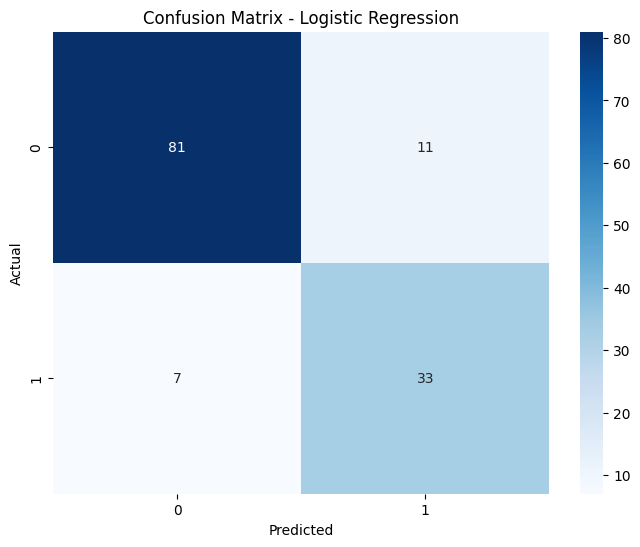

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        92
           1       0.75      0.82      0.79        40

    accuracy                           0.86       132
   macro avg       0.84      0.85      0.84       132
weighted avg       0.87      0.86      0.87       132



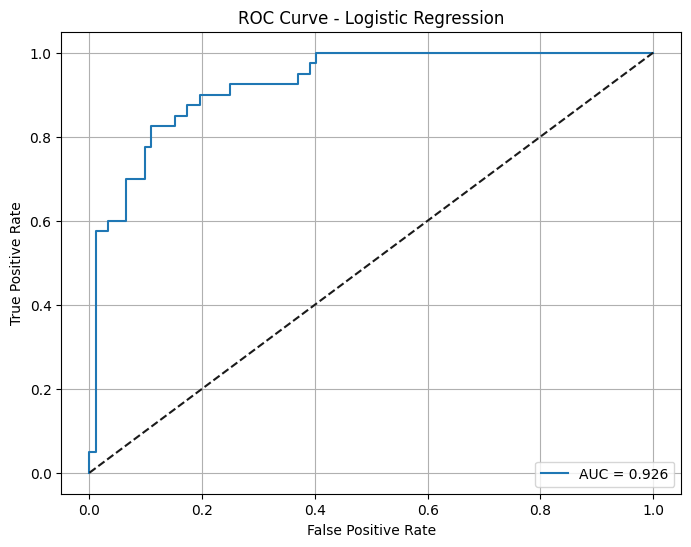


--- K-Nearest Neighbor Evaluation ---


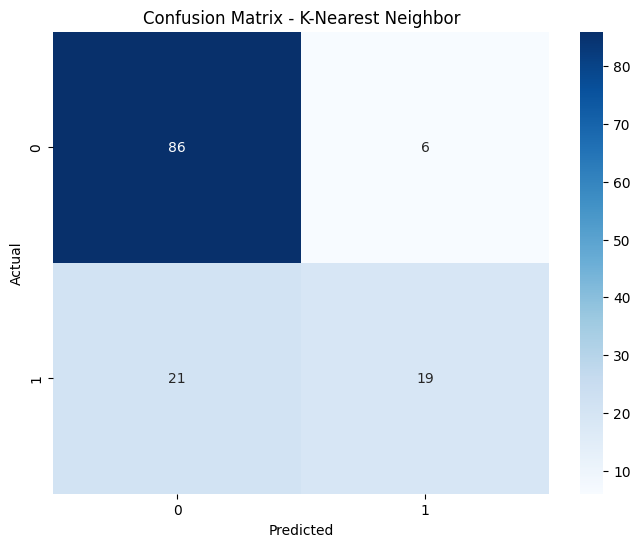

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        92
           1       0.76      0.47      0.58        40

    accuracy                           0.80       132
   macro avg       0.78      0.70      0.72       132
weighted avg       0.79      0.80      0.78       132



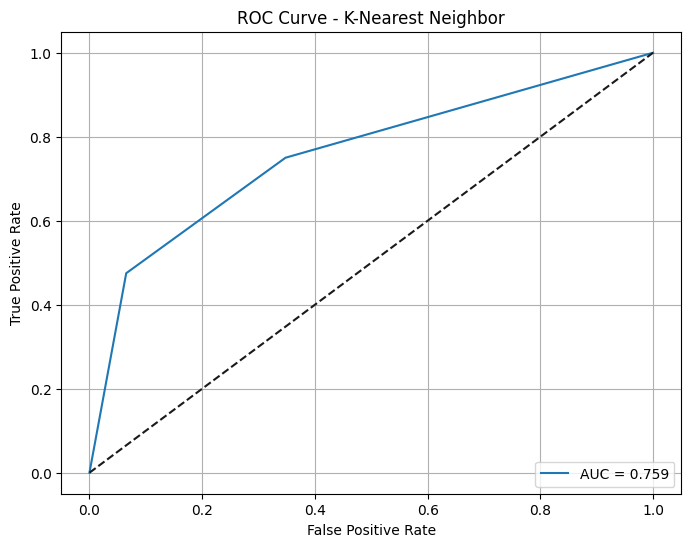


--- Naive Bayes Evaluation ---


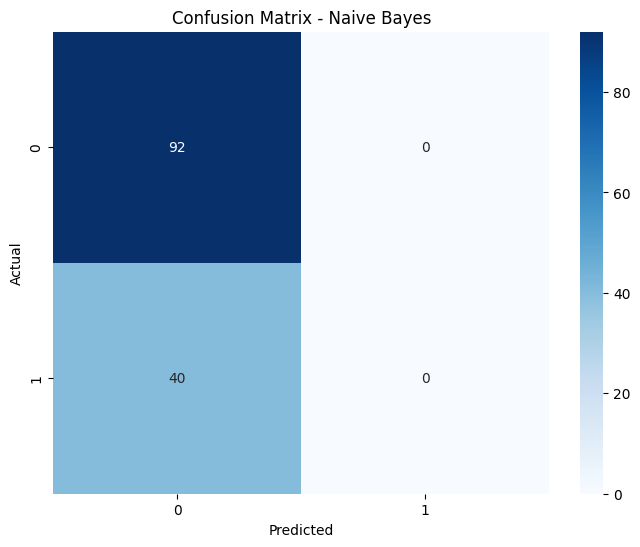

              precision    recall  f1-score   support

           0       0.70      1.00      0.82        92
           1       0.00      0.00      0.00        40

    accuracy                           0.70       132
   macro avg       0.35      0.50      0.41       132
weighted avg       0.49      0.70      0.57       132



c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

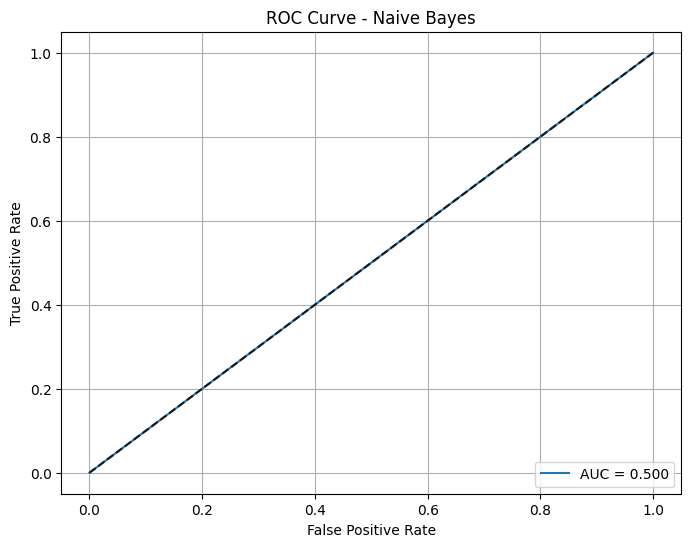


--- Decision Tree Evaluation ---


c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


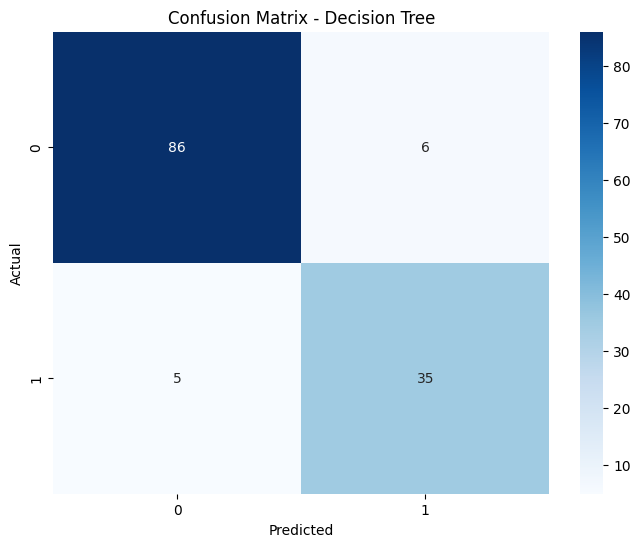

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        92
           1       0.85      0.88      0.86        40

    accuracy                           0.92       132
   macro avg       0.90      0.90      0.90       132
weighted avg       0.92      0.92      0.92       132



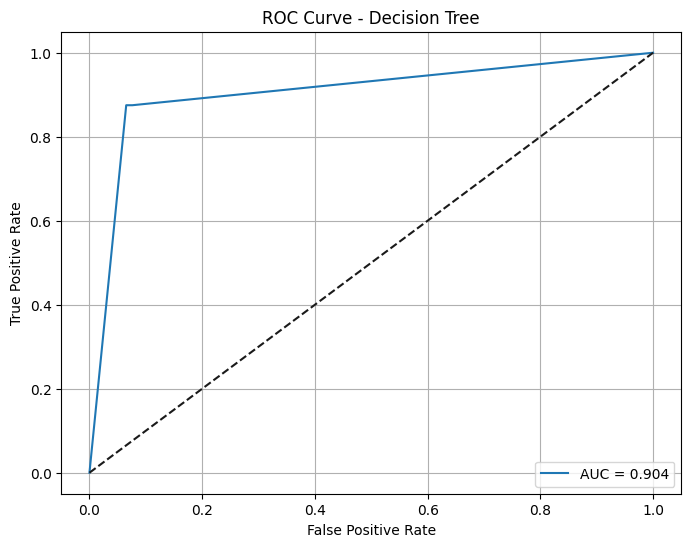

In [129]:
from sklearn.metrics import log_loss
# Evaluasi setiap model
lr_metrics = evaluate_model(y_test, y_pred_lr, y_prob_lr, "Logistic Regression")
knn_metrics = evaluate_model(y_test, y_pred_knn, y_prob_knn, "K-Nearest Neighbor")
nb_metrics = evaluate_model(y_test, y_pred_nb, y_prob_nb, "Naive Bayes")
dt_metrics = evaluate_model(y_test, y_pred_dt, y_prob_dt, "Decision Tree")

In [130]:
results = pd.DataFrame({
    'Logistic Regression': lr_metrics,
    'K-Nearest Neighbor': knn_metrics,
    'Naive Bayes': nb_metrics,
    'Decision Tree': dt_metrics
})

print("\nPerbandingan Kinerja Model:")
print(results.T)  # transpose



Perbandingan Kinerja Model:
                     accuracy  precision    recall        f1  log_loss
Logistic Regression  0.863636   0.868802  0.863636  0.865368  0.351602
K-Nearest Neighbor   0.795455   0.790484  0.795455  0.779562  4.563219
Naive Bayes          0.696970   0.485767  0.696970  0.572511  0.613466
Decision Tree        0.916667   0.917359  0.916667  0.916953  3.008889


In [131]:
# Perbandingan performance model
models = ['Logistic Regression', 'KNN', 'Naive Bayes', 'Decision Tree']
metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': [lr_metrics['accuracy'], knn_metrics['accuracy'],
                nb_metrics['accuracy'], dt_metrics['accuracy']],
    'Precision': [lr_metrics['precision'], knn_metrics['precision'],
                nb_metrics['precision'], dt_metrics['precision']],
    'Recall': [lr_metrics['recall'], knn_metrics['recall'],
              nb_metrics['recall'], dt_metrics['recall']],
    'F1 Score': [lr_metrics['f1'], knn_metrics['f1'],
                nb_metrics['f1'], dt_metrics['f1']]
})

print("\nPerbandingan Performa Model:")
print(metrics_df)


Perbandingan Performa Model:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.863636   0.868802  0.863636  0.865368
1                  KNN  0.795455   0.790484  0.795455  0.779562
2          Naive Bayes  0.696970   0.485767  0.696970  0.572511
3        Decision Tree  0.916667   0.917359  0.916667  0.916953


## 📈 Visualisasi Perbandingan Performa Model

Gunakan visualisasi batang (bar plot) untuk membandingkan performa model klasifikasi berdasarkan metrik evaluasi utama:

- **Accuracy**
- **Precision**
- **Recall**
- **F1 Score**

Visualisasi ini membantu mengidentifikasi model mana yang paling konsisten dan efektif dalam memprediksi data uji. 

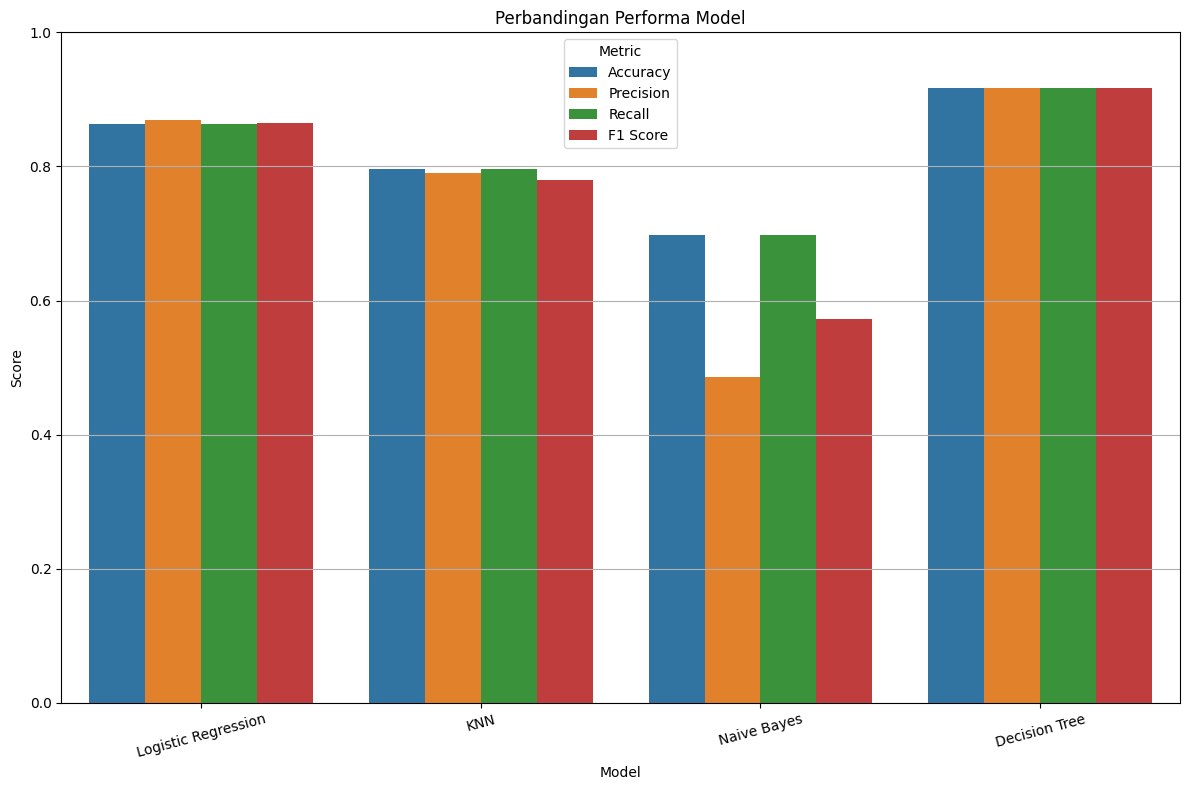

In [132]:
# Visualisasi perbandingan model
plt.figure(figsize=(12, 8))
metrics_long = pd.melt(metrics_df, id_vars=['Model'],
                       value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                       var_name='Metric', value_name='Score')
sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_long)
plt.title('Perbandingan Performa Model')
plt.xticks(rotation=15)
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

## 🌳 Visualisasi Pohon Keputusan

Visualisasi ini menampilkan struktur **Decision Tree** yang telah dilatih. Setiap node menunjukkan:

- **Fitur yang digunakan untuk split**
- **Nilai ambang split**
- **Gini impurity**
- **Jumlah sampel**
- **Distribusi kelas**

Jika pohon terlalu kompleks, pertimbangkan untuk memotong kedalaman (`max_depth`) agar lebih mudah dibaca.

In [133]:
# Visualisasi Decision Tree (jika tidak terlalu kompleks)
plt.figure(figsize=(300, 100))
plot_tree(dt_model, filled=True, feature_names=X.columns,
         class_names=[str(c) for c in np.unique(y)], rounded=True)
plt.title('Visualisasi Decision Tree')
plt.show()

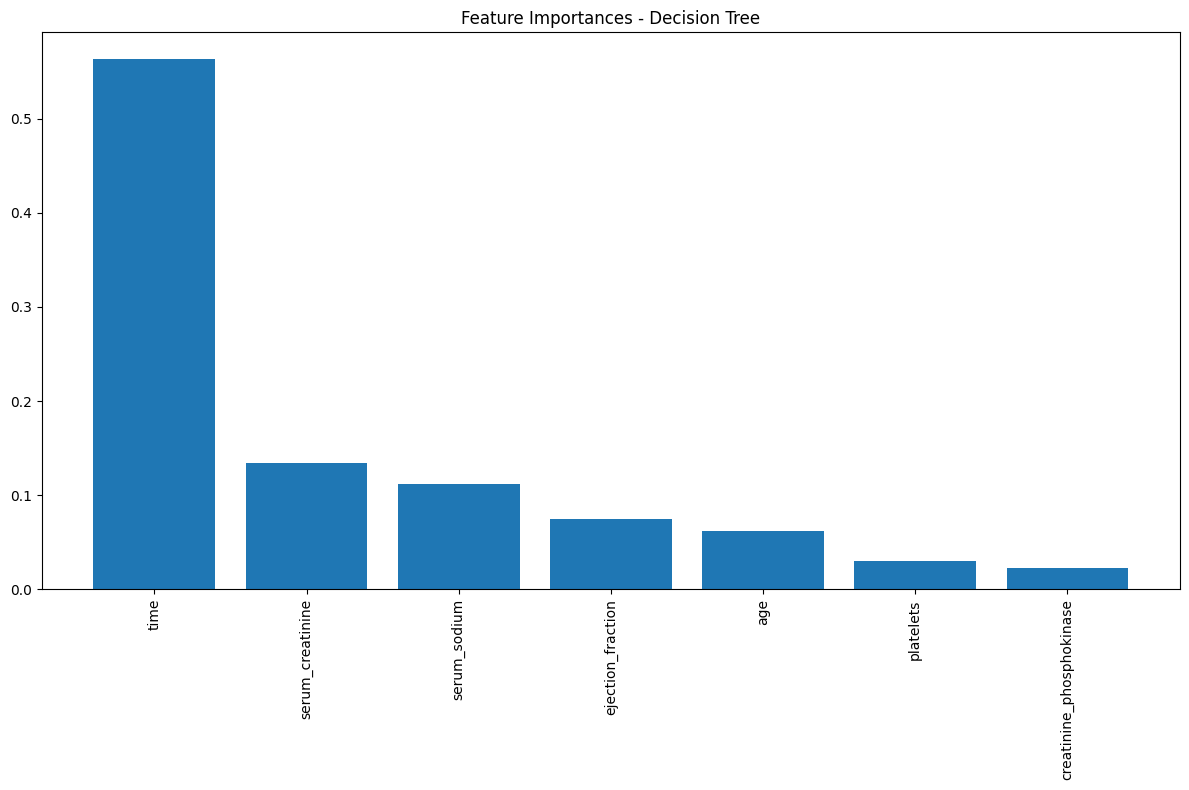

In [134]:
# Feature Importance untuk Decision Tree
if hasattr(dt_model, 'feature_importances_'):
    importances = dt_model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(12, 8))
    plt.bar(range(X.shape[1]), importances[indices])
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
    plt.title('Feature Importances - Decision Tree')
    plt.tight_layout()
    plt.show()

## ⚖️ Visualisasi Koefisien Logistic Regression

Plot berikut menunjukkan seberapa besar kontribusi masing-masing fitur terhadap prediksi model Logistic Regression:

- Koefisien positif ➜ meningkatkan peluang kelas target 1 (misalnya, DEATH_EVENT = 1)
- Koefisien negatif ➜ menurunkan peluang kelas target 1
- Semakin jauh dari nol, semakin besar pengaruh fitur tersebut terhadap prediksi

Visualisasi ini membantu dalam interpretasi model secara **interpretable dan transparan**.

C:\Users\asus\AppData\Local\Temp\ipykernel_32472\2416037614.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x="Coefficient", y="Feature", palette="coolwarm")


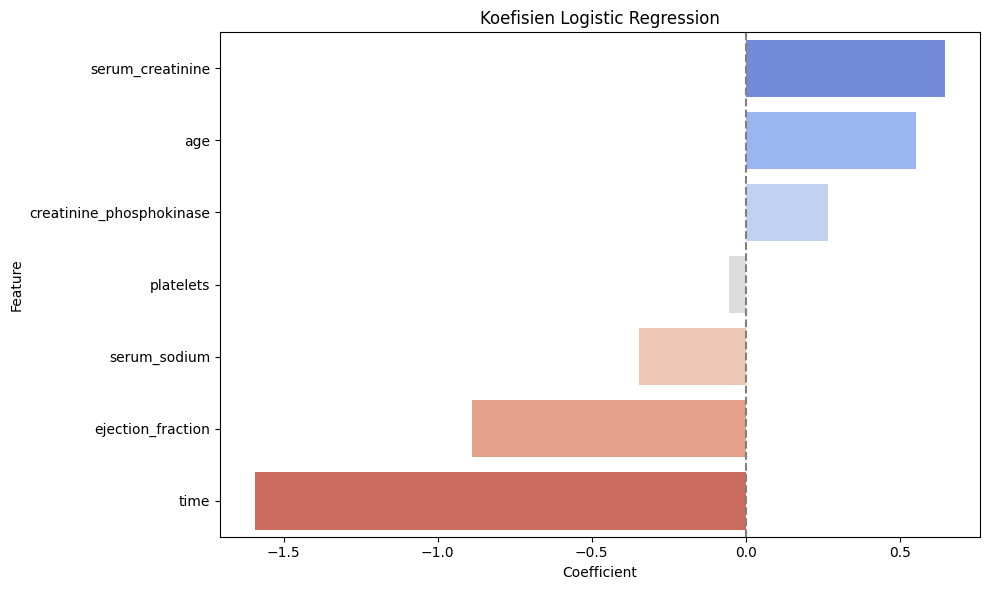

In [135]:
# Visualisasi koefisien
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x="Coefficient", y="Feature", palette="coolwarm")
plt.title("Koefisien Logistic Regression")
plt.axvline(x=0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

## 📊 Rangkuman Performa Model

Setelah dilakukan pelatihan dan evaluasi terhadap empat model klasifikasi yaitu:
- Logistic Regression
- K-Nearest Neighbor (KNN)
- Naive Bayes
- Decision Tree

Model terbaik berdasarkan **akurasi tertinggi** adalah:

In [136]:
# Rangkuman performa model
best_model = metrics_df.loc[metrics_df['Accuracy'].idxmax(), 'Model']
print(f"\nModel terbaik berdasarkan akurasi: {best_model}")
print("\nRangkuman hasil:")
for model in models:
    idx = metrics_df[metrics_df['Model'] == model].index[0]
    acc = metrics_df.loc[idx, 'Accuracy']
    print(f"- {model}: {acc:.4f}")


Model terbaik berdasarkan akurasi: Decision Tree

Rangkuman hasil:
- Logistic Regression: 0.8636
- KNN: 0.7955
- Naive Bayes: 0.6970
- Decision Tree: 0.9167


## ✅ Kesimpulan

- Model yang dipilih memiliki akurasi tertinggi di antara keempat model yang diuji.
- Namun, akurasi bukan satu-satunya indikator — **Precision, Recall, dan F1 Score** juga perlu dipertimbangkan terutama jika data tidak seimbang.
- Logistic Regression cocok jika interpretabilitas penting, sedangkan Decision Tree memberikan visualisasi pohon keputusan yang intuitif.
- KNN bergantung pada pemilihan nilai *K*, dan performanya dapat menurun jika data sangat besar.
- Naive Bayes bekerja baik pada data yang bersifat *independen antar fitur*.

Pemilihan akhir model tetap harus mempertimbangkan konteks aplikasi, kebutuhan interpretasi, serta performa menyeluruh.